In [ ]:
import os
import zipfile
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adamax

In [ ]:
# Définir les chemins des fichiers
train_zip_path = '/content/drive/MyDrive/1.Projet_LFG/Train_Data.zip'
test_zip_path = '/content/drive/MyDrive/1.Projet_LFG/Test_Data.zip'
y_train_path = '/content/drive/MyDrive/1.Projet_LFG/Y_train_1rknArQ.csv'
train_extracted_path = '/content/drive/MyDrive/1.Projet_LFG/train_data/'
test_extracted_path = '/content/drive/MyDrive/1.Projet_LFG/test_data/'

submission = pd.read_csv('/content/drive/MyDrive/1.Projet_LFG/submission.csv')

In [ ]:
submission

,ID,HOME_WINS,DRAW,AWAY_WINS
0,12303,0,1,0
1,12303,0,1,0
2,12303,0,1,0
3,12303,0,1,0
4,12303,0,1,0
...,...,...,...,...
10217301,37670,0,1,0
10217302,37670,0,1,0
10217303,37670,0,1,0
10217304,37670,0,1,0


In [ ]:
submission['DRAW'].sum()

10217306

In [ ]:
Y_train

,ID,HOME_WINS,DRAW,AWAY_WINS
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,3,1,0,0
4,4,0,1,0
...,...,...,...,...
12298,12298,0,0,1
12299,12299,0,0,1
12300,12300,0,0,1
12301,12301,1,0,0


In [ ]:
# Lecture optimisée des fichiers CSV
def read_and_optimize_csv(filepath):
    df = pd.read_csv(filepath)
    for col in df.select_dtypes(include=['float64']).columns:
        df[col] = df[col].astype('float32')
    for col in df.select_dtypes(include=['int64']).columns:
        df[col] = df[col].astype('int32')
    return df
imputer = IterativeImputer()
# Lire les fichiers CSV extraits
X_train_home_team = read_and_optimize_csv(os.path.join(train_extracted_path, 'train_home_team_statistics_df.csv')).fillna(0.0)
X_train_away_team = read_and_optimize_csv(os.path.join(train_extracted_path, 'train_away_team_statistics_df.csv')).fillna(0.0)
X_train_home_players = read_and_optimize_csv(os.path.join(train_extracted_path, 'train_home_player_statistics_df.csv')).fillna(0.0)
X_train_away_players = read_and_optimize_csv(os.path.join(train_extracted_path, 'train_home_player_statistics_df.csv')).fillna(0.0)
Y_train = read_and_optimize_csv(y_train_path)

In [ ]:
X_train_home_players

,ID,LEAGUE,TEAM_NAME,POSITION,PLAYER_NAME,PLAYER_ACCURATE_CROSSES_season_sum,PLAYER_ACCURATE_PASSES_season_sum,PLAYER_AERIALS_WON_season_sum,PLAYER_ASSISTS_season_sum,PLAYER_BIG_CHANCES_CREATED_season_sum,...,PLAYER_STARTING_LINEUP_5_last_match_std,PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std,PLAYER_TACKLES_5_last_match_std,PLAYER_TOTAL_CROSSES_5_last_match_std,PLAYER_TOTAL_DUELS_5_last_match_std,PLAYER_YELLOWCARDS_5_last_match_std,PLAYER_PUNCHES_5_last_match_std,PLAYER_LONG_BALLS_5_last_match_std,PLAYER_LONG_BALLS_WON_5_last_match_std,PLAYER_SHOTS_OFF_TARGET_5_last_match_std
0,0,Ligue 1,Toulouse,defender,Agustín Rogel,0.0,8.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,Ligue 1,Toulouse,defender,Mathieu Goncalves,0.0,7.0,4.0,0.0,0.0,...,63.0,14.0,13.0,0.0,36.0,77.0,0.0,0.0,0.0,0.0
2,0,Ligue 1,Toulouse,goalkeeper,Baptiste Reynet,0.0,33.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
3,0,Ligue 1,Toulouse,midfielder,Jean-Victor Makengo,8.0,27.0,2.0,0.0,8.0,...,63.0,0.0,13.0,6.0,17.0,0.0,0.0,0.0,0.0,0.0
4,0,Ligue 1,Toulouse,0.0,Efthymios Koulouris,2.0,23.0,27.0,14.0,8.0,...,63.0,17.0,10.0,13.0,27.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237074,12302,La Liga,Valencia,midfielder,Carlos Soler,3.0,17.0,3.0,0.0,6.0,...,0.0,28.0,18.0,12.0,6.0,77.0,0.0,0.0,0.0,0.0
237075,12302,La Liga,Valencia,attacker,Kévin Gameiro,0.0,10.0,1.0,16.0,12.0,...,77.0,34.0,27.0,19.0,24.0,0.0,0.0,0.0,0.0,0.0
237076,12302,La Liga,Valencia,midfielder,Francis Coquelin,0.0,50.0,10.0,0.0,0.0,...,0.0,28.0,71.0,6.0,27.0,77.0,0.0,0.0,0.0,0.0
237077,12302,La Liga,Valencia,goalkeeper,Jaume Doménech,0.0,9.0,0.0,0.0,0.0,...,63.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train_home_team

,ID,LEAGUE,TEAM_NAME,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,...,TEAM_YELLOWCARDS_5_last_match_std,TEAM_REDCARDS_5_last_match_std,TEAM_OFFSIDES_5_last_match_std,TEAM_ATTACKS_5_last_match_std,TEAM_PENALTIES_5_last_match_std,TEAM_SUBSTITUTIONS_5_last_match_std,TEAM_BALL_SAFE_5_last_match_std,TEAM_DANGEROUS_ATTACKS_5_last_match_std,TEAM_INJURIES_5_last_match_std,TEAM_GOALS_5_last_match_std
0,0,Ligue 1,Toulouse,3.0,2.0,5.0,2.0,1.0,2.0,2.0,...,3.0,0.0,6.0,0.0,10.0,8.0,7.0,2.0,4.0,3.0
1,1,Ligue 2,Brest,6.0,8.0,3.0,6.0,5.0,8.0,7.0,...,4.0,0.0,4.0,3.0,10.0,0.0,1.0,2.0,8.0,4.0
2,2,Serie A,Sampdoria,4.0,2.0,5.0,2.0,8.0,1.0,1.0,...,4.0,5.0,6.0,3.0,6.0,7.0,2.0,3.0,2.0,4.0
3,3,League One,Coventry City,7.0,5.0,5.0,6.0,6.0,9.0,9.0,...,4.0,0.0,1.0,8.0,8.0,5.0,5.0,5.0,0.0,6.0
4,4,Premier League,Wolverhampton Wanderers,3.0,3.0,2.0,3.0,4.0,4.0,3.0,...,1.0,0.0,2.0,5.0,8.0,7.0,2.0,6.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12298,12298,League One,Southend United,4.0,2.0,3.0,4.0,7.0,4.0,4.0,...,4.0,0.0,2.0,5.0,0.0,5.0,0.0,0.0,0.0,4.0
12299,12299,Liga Portugal,Boavista,4.0,2.0,3.0,1.0,5.0,1.0,1.0,...,6.0,10.0,7.0,2.0,0.0,0.0,3.0,10.0,6.0,1.0
12300,12300,Bundesliga,Schalke 04,4.0,3.0,5.0,3.0,5.0,1.0,1.0,...,7.0,8.0,0.0,7.0,0.0,0.0,3.0,1.0,3.0,2.0
12301,12301,League One,Fleetwood Town,2.0,0.0,1.0,1.0,0.0,0.0,0.0,...,10.0,10.0,0.0,6.0,8.0,3.0,0.0,3.0,0.0,5.0


In [ ]:
X_train_away_team

,ID,LEAGUE,TEAM_NAME,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,...,TEAM_YELLOWCARDS_5_last_match_std,TEAM_REDCARDS_5_last_match_std,TEAM_OFFSIDES_5_last_match_std,TEAM_ATTACKS_5_last_match_std,TEAM_PENALTIES_5_last_match_std,TEAM_SUBSTITUTIONS_5_last_match_std,TEAM_BALL_SAFE_5_last_match_std,TEAM_DANGEROUS_ATTACKS_5_last_match_std,TEAM_INJURIES_5_last_match_std,TEAM_GOALS_5_last_match_std
0,0,Ligue 1,Olympique Marseille,4.0,1.0,4.0,1.0,5.0,4.0,3.0,...,5.0,5.0,4.0,0.0,6.0,8.0,4.0,3.0,2.0,3.0
1,1,Ligue 2,Red Star,4.0,3.0,4.0,3.0,8.0,8.0,7.0,...,0.0,0.0,3.0,1.0,8.0,4.0,10.0,0.0,5.0,3.0
2,2,Serie A,Bologna,4.0,3.0,4.0,2.0,6.0,4.0,4.0,...,6.0,10.0,4.0,4.0,0.0,8.0,3.0,0.0,9.0,6.0
3,3,League One,Bolton Wanderers,0.0,0.0,0.0,0.0,1.0,3.0,3.0,...,0.0,0.0,1.0,2.0,0.0,5.0,6.0,3.0,0.0,2.0
4,4,Premier League,Leicester City,5.0,4.0,5.0,6.0,5.0,6.0,6.0,...,1.0,0.0,4.0,4.0,9.0,4.0,1.0,4.0,6.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12298,12298,League One,Accrington Stanley,6.0,6.0,5.0,7.0,7.0,4.0,3.0,...,5.0,5.0,0.0,1.0,6.0,10.0,1.0,1.0,0.0,2.0
12299,12299,Liga Portugal,Marítimo,3.0,2.0,6.0,1.0,3.0,4.0,4.0,...,7.0,5.0,2.0,2.0,0.0,0.0,1.0,6.0,9.0,1.0
12300,12300,Bundesliga,RB Leipzig,7.0,7.0,6.0,7.0,3.0,3.0,2.0,...,8.0,0.0,3.0,2.0,0.0,0.0,6.0,3.0,4.0,4.0
12301,12301,League One,Doncaster Rovers,1.0,0.0,6.0,7.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,8.0,3.0,1.0,2.0,0.0,6.0


In [ ]:
# Fusionner les données d'équipe et de joueurs sur l'ID du match
#X_train = pd.merge(X_train_home_team, X_train_away_team, on='ID', suffixes=('_home', '_away'))
X_train = pd.merge(X_train_home_players, X_train_away_players, on='ID', suffixes=('_home', '_away'))
#X_train = pd.merge(X_train, X_train_home_players, on='ID')
#X_train = pd.merge(X_train, X_train_away_players, on='ID')

# Sélectionner uniquement les colonnes de métriques pour l'entraînement
non_metric_columns = ['ID', 'LEAGUE_home', 'TEAM_NAME_home', 'LEAGUE_away', 'TEAM_NAME_away', 'POSITION_home', 'PLAYER_NAME_home', 'POSITION_away', 'PLAYER_NAME_away']
#metrics_columns = [col for col in X_train.columns if col not in non_metric_columns and X_train[col].dtype in ['float32', 'int32']]
metrics_columns = [col for col in X_train.columns if X_train[col].dtype in ['float32', 'int32']]
X_train_metrics = X_train[metrics_columns]

In [ ]:
X_train

,ID,LEAGUE_home,TEAM_NAME_home,POSITION_home,PLAYER_NAME_home,PLAYER_ACCURATE_CROSSES_season_sum_home,PLAYER_ACCURATE_PASSES_season_sum_home,PLAYER_AERIALS_WON_season_sum_home,PLAYER_ASSISTS_season_sum_home,PLAYER_BIG_CHANCES_CREATED_season_sum_home,...,PLAYER_STARTING_LINEUP_5_last_match_std_away,PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std_away,PLAYER_TACKLES_5_last_match_std_away,PLAYER_TOTAL_CROSSES_5_last_match_std_away,PLAYER_TOTAL_DUELS_5_last_match_std_away,PLAYER_YELLOWCARDS_5_last_match_std_away,PLAYER_PUNCHES_5_last_match_std_away,PLAYER_LONG_BALLS_5_last_match_std_away,PLAYER_LONG_BALLS_WON_5_last_match_std_away,PLAYER_SHOTS_OFF_TARGET_5_last_match_std_away
0,0,Ligue 1,Toulouse,defender,Agustín Rogel,0.0,8.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,Ligue 1,Toulouse,defender,Agustín Rogel,0.0,8.0,5.0,0.0,0.0,...,63.0,14.0,13.0,0.0,36.0,77.0,0.0,0.0,0.0,0.0
2,0,Ligue 1,Toulouse,defender,Agustín Rogel,0.0,8.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
3,0,Ligue 1,Toulouse,defender,Agustín Rogel,0.0,8.0,5.0,0.0,0.0,...,63.0,0.0,13.0,6.0,17.0,0.0,0.0,0.0,0.0,0.0
4,0,Ligue 1,Toulouse,defender,Agustín Rogel,0.0,8.0,5.0,0.0,0.0,...,63.0,17.0,10.0,13.0,27.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4611584,12302,La Liga,Valencia,attacker,Rodrigo,15.0,26.0,10.0,100.0,62.0,...,0.0,28.0,18.0,12.0,6.0,77.0,0.0,0.0,0.0,0.0
4611585,12302,La Liga,Valencia,attacker,Rodrigo,15.0,26.0,10.0,100.0,62.0,...,77.0,34.0,27.0,19.0,24.0,0.0,0.0,0.0,0.0,0.0
4611586,12302,La Liga,Valencia,attacker,Rodrigo,15.0,26.0,10.0,100.0,62.0,...,0.0,28.0,71.0,6.0,27.0,77.0,0.0,0.0,0.0,0.0
4611587,12302,La Liga,Valencia,attacker,Rodrigo,15.0,26.0,10.0,100.0,62.0,...,63.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Initialiser le scaler à l'extérieur de la fonction de prétraitement
scaler = StandardScaler()

# Fonction de prétraitement des données
def preprocess_data(X, Y, scaler):
    X = X.fillna(0)  # Remplacer les valeurs manquantes par 0
    X_scaled = scaler.fit_transform(X)  # Normalisation des données
    Y_encoded = LabelEncoder().fit_transform(Y)
    Y_categorical = to_categorical(Y_encoded)
    return X_scaled, Y_categorical

# Prétraiter les données d'entraînement par lots
batch_size = 1000  # Taille des lots pour le traitement par batch

# Initialiser les listes pour les données traitées
X_scaled_list = []
Y_categorical_list = []

for i in range(0, len(X_train_metrics), batch_size):
    X_batch = X_train_metrics.iloc[i:i+batch_size]
    Y_batch = Y_train[['HOME_WINS', 'DRAW', 'AWAY_WINS']].iloc[i:i+batch_size]

    # Vérifier si Y_batch est vide
    if Y_batch.empty:
        break

    Y_batch = Y_batch.idxmax(axis=1)
    X_scaled_batch, Y_categorical_batch = preprocess_data(X_batch, Y_batch, scaler)

    # Vérifier que les tailles des batches correspondent
    if X_scaled_batch.shape[0] == Y_categorical_batch.shape[0]:
        X_scaled_list.append(X_scaled_batch)
        Y_categorical_list.append(Y_categorical_batch)

# Convertir les listes en arrays
X_scaled = np.vstack(X_scaled_list)
Y_categorical = np.vstack(Y_categorical_list)

X_train_scaled, X_val_scaled, Y_train_categorical, Y_val_categorical = train_test_split(X_scaled, Y_categorical, test_size=0.1, random_state=42)

In [ ]:
# Construction du modèle de deep learning
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compilation du modèle
model.compile(loss='categorical_crossentropy', optimizer='adamax', metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(X_train_scaled, Y_train_categorical, epochs=100, batch_size=64, validation_split=0.1)

# Évaluation du modèle sur les données de validation
loss, accuracy = model.evaluate(X_val_scaled, Y_val_categorical)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

Epoch 1/100
152/152 [==============================] - 2s 5ms/step - loss: 1.1010 - accuracy: 0.4073 - val_loss: 1.0897 - val_accuracy: 0.4241
Epoch 2/100
152/152 [==============================] - 1s 4ms/step - loss: 1.0479 - accuracy: 0.4573 - val_loss: 1.0950 - val_accuracy: 0.4111
Epoch 3/100
152/152 [==============================] - 1s 4ms/step - loss: 1.0191 - accuracy: 0.4836 - val_loss: 1.0967 - val_accuracy: 0.4102
Epoch 4/100
152/152 [==============================] - 1s 4ms/step - loss: 0.9904 - accuracy: 0.5180 - val_loss: 1.1136 - val_accuracy: 0.4222
Epoch 5/100
152/152 [==============================] - 1s 4ms/step - loss: 0.9580 - accuracy: 0.5444 - val_loss: 1.1157 - val_accuracy: 0.4130
Epoch 6/100
152/152 [==============================] - 1s 4ms/step - loss: 0.9205 - accuracy: 0.5716 - val_loss: 1.1333 - val_accuracy: 0.4037
Epoch 7/100
152/152 [==============================] - 1s 4ms/step - loss: 0.8818 - accuracy: 0.6057 - val_loss: 1.1443 - val_accuracy: 0.3972

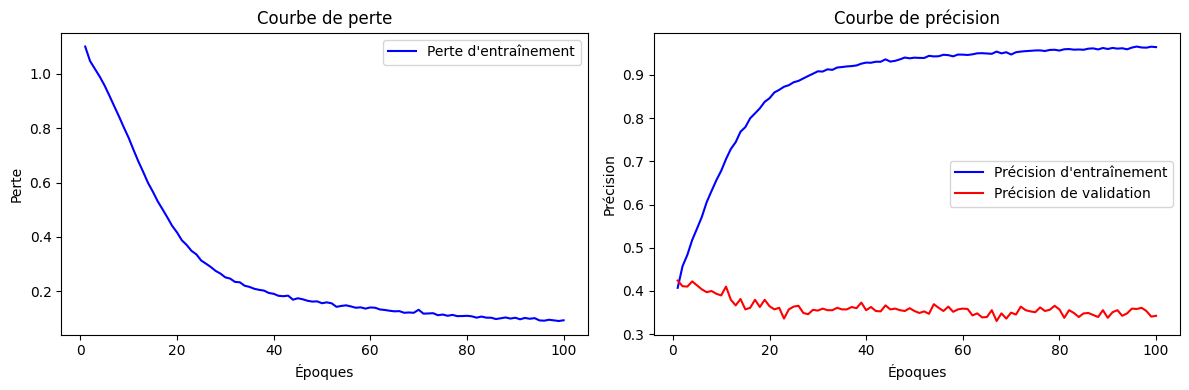

In [ ]:
# Tracer la courbe de perte et de précision
epochs = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(12, 4))

# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], 'b-', label='Perte d\'entraînement')
#plt.plot(epochs, history.history['val_loss'], 'r-', label='Perte de validation')
plt.title('Courbe de perte')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

# Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['accuracy'], 'b-', label='Précision d\'entraînement')
plt.plot(epochs, history.history['val_accuracy'], 'r-', label='Précision de validation')
plt.title('Courbe de précision')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Lire les données de test
X_test_home_team = pd.read_csv(os.path.join(test_extracted_path, 'test_home_team_statistics_df.csv')).fillna(0.0)
X_test_away_team = pd.read_csv(os.path.join(test_extracted_path, 'test_away_team_statistics_df.csv')).fillna(0.0)
X_test_home_players = pd.read_csv(os.path.join(test_extracted_path, 'test_home_player_statistics_df.csv')).fillna(0.0)
X_test_away_players = pd.read_csv(os.path.join(test_extracted_path, 'test_away_player_statistics_df.csv')).fillna(0.0)

# Fusionner les données de test
#X_test = pd.merge(X_test_home_team, X_test_away_team, on='ID', suffixes=('_home', '_away'))
X_test = pd.merge(X_test_home_players, X_test_away_players, on='ID', suffixes=('_home', '_away'))
#X_test = pd.merge(X_test, X_test_home_players, on='ID')
#X_test = pd.merge(X_test, X_test_away_players, on='ID')

In [ ]:
X_test_home_team

,ID,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,TEAM_CORNERS_season_sum,...,TEAM_YELLOWCARDS_5_last_match_std,TEAM_REDCARDS_5_last_match_std,TEAM_OFFSIDES_5_last_match_std,TEAM_ATTACKS_5_last_match_std,TEAM_PENALTIES_5_last_match_std,TEAM_SUBSTITUTIONS_5_last_match_std,TEAM_BALL_SAFE_5_last_match_std,TEAM_DANGEROUS_ATTACKS_5_last_match_std,TEAM_INJURIES_5_last_match_std,TEAM_GOALS_5_last_match_std
0,12303,3.0,6.0,5.0,1.0,3.0,9.0,8.0,10.0,6.0,...,2.0,9.0,0.0,10.0,0.0,4.0,4.0,6.0,2.0,3.0
1,12304,3.0,2.0,4.0,2.0,6.0,1.0,1.0,2.0,4.0,...,9.0,10.0,3.0,1.0,8.0,3.0,8.0,1.0,0.0,2.0
2,12305,7.0,10.0,8.0,8.0,1.0,4.0,5.0,0.0,10.0,...,6.0,8.0,2.0,9.0,0.0,6.0,0.0,9.0,0.0,0.0
3,12306,5.0,7.0,5.0,9.0,5.0,7.0,6.0,3.0,5.0,...,4.0,5.0,2.0,3.0,8.0,0.0,2.0,2.0,2.0,3.0
4,12307,5.0,4.0,6.0,3.0,5.0,0.0,0.0,2.0,2.0,...,5.0,0.0,0.0,7.0,5.0,0.0,1.0,6.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25363,37666,5.0,5.0,5.0,5.0,7.0,6.0,6.0,4.0,6.0,...,2.0,6.0,2.0,1.0,5.0,6.0,6.0,5.0,2.0,0.0
25364,37667,5.0,5.0,2.0,8.0,3.0,7.0,7.0,2.0,2.0,...,3.0,0.0,2.0,8.0,0.0,0.0,4.0,8.0,10.0,10.0
25365,37668,10.0,10.0,10.0,8.0,8.0,5.0,5.0,2.0,6.0,...,7.0,0.0,8.0,4.0,0.0,7.0,0.0,2.0,0.0,3.0
25366,37669,4.0,3.0,5.0,3.0,7.0,7.0,7.0,0.0,4.0,...,5.0,0.0,4.0,7.0,8.0,5.0,6.0,4.0,5.0,4.0


In [ ]:
X_test

,ID,POSITION_home,PLAYER_ACCURATE_CROSSES_season_sum_home,PLAYER_ACCURATE_PASSES_season_sum_home,PLAYER_AERIALS_WON_season_sum_home,PLAYER_ASSISTS_season_sum_home,PLAYER_BIG_CHANCES_CREATED_season_sum_home,PLAYER_BIG_CHANCES_MISSED_season_sum_home,PLAYER_BLOCKED_SHOTS_season_sum_home,PLAYER_CAPTAIN_season_sum_home,...,PLAYER_STARTING_LINEUP_5_last_match_std_away,PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std_away,PLAYER_TACKLES_5_last_match_std_away,PLAYER_TOTAL_CROSSES_5_last_match_std_away,PLAYER_TOTAL_DUELS_5_last_match_std_away,PLAYER_YELLOWCARDS_5_last_match_std_away,PLAYER_PUNCHES_5_last_match_std_away,PLAYER_LONG_BALLS_5_last_match_std_away,PLAYER_LONG_BALLS_WON_5_last_match_std_away,PLAYER_SHOTS_OFF_TARGET_5_last_match_std_away
0,12303,goalkeeper,0.0,22.0,1.0,0.0,0.0,0.0,0.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12303,goalkeeper,0.0,22.0,1.0,0.0,0.0,0.0,0.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12303,goalkeeper,0.0,22.0,1.0,0.0,0.0,0.0,0.0,14.0,...,0.0,31.0,37.0,50.0,17.0,61.0,0.0,0.0,0.0,0.0
3,12303,goalkeeper,0.0,22.0,1.0,0.0,0.0,0.0,0.0,14.0,...,77.0,0.0,46.0,0.0,47.0,50.0,0.0,0.0,0.0,0.0
4,12303,goalkeeper,0.0,22.0,1.0,0.0,0.0,0.0,0.0,14.0,...,0.0,0.0,0.0,0.0,4.0,50.0,25.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10217301,37670,0.0,75.0,28.0,1.0,7.0,16.0,0.0,4.0,0.0,...,77.0,18.0,22.0,42.0,24.0,0.0,0.0,0.0,0.0,0.0
10217302,37670,0.0,75.0,28.0,1.0,7.0,16.0,0.0,4.0,0.0,...,0.0,14.0,11.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0
10217303,37670,0.0,75.0,28.0,1.0,7.0,16.0,0.0,4.0,0.0,...,0.0,32.0,20.0,36.0,29.0,77.0,0.0,0.0,0.0,0.0
10217304,37670,0.0,75.0,28.0,1.0,7.0,16.0,0.0,4.0,0.0,...,0.0,55.0,33.0,0.0,13.0,94.0,0.0,0.0,0.0,0.0


In [ ]:
# Supprimer les lignes dupliquées
X_test = X_test.drop_duplicates()

In [ ]:
# Prétraitement des données de test
X_test_metrics = X_test[metrics_columns]

# Utiliser le scaler déjà ajusté pour les données de test
X_test_scaled = scaler.transform(X_test_metrics)

In [ ]:
# Prédictions finales par lots
batch_size = 1000  # Taille du batch
predictions_list = []

for i in range(0, len(X_test_scaled), batch_size):
    X_test_batch = X_test_scaled[i:i+batch_size]
    predictions_batch = model.predict(X_test_batch)
    predictions_list.append(predictions_batch)

# Convertir la liste des prédictions en array
predictions = np.vstack(predictions_list)

def sortie_booleenne(y):
    y1 = np.zeros_like(y, dtype=int)  # Assure que y1 est de type entier
    max_indices = np.argmax(y, axis=1)
    for i, index in enumerate(max_indices):
        y1[i, index] = 1
    return y1

prediction_booleen = sortie_booleenne(predictions)


# Préparer le fichier de soumission
submission = pd.DataFrame(prediction_booleen, columns=['HOME_WINS', 'DRAW', 'AWAY_WINS'])
submission['ID'] = X_test['ID'].values
submission = submission[['ID', 'HOME_WINS', 'DRAW', 'AWAY_WINS']]
submission.to_csv('/content/drive/MyDrive/1.Projet_LFG/submission.csv', index=False)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
10/10 [==============================] - 0s 2ms/step


In [ ]:
predictions

array([[0.        , 0.99999994, 0.        ],
       [0.        , 0.99999994, 0.        ],
       [0.        , 0.99999994, 0.        ],
       ...,
       [0.        , 0.99999994, 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ]], dtype=float32)

In [ ]:
def sortie_booleenne(y):
    y1 = np.zeros_like(y)
    max_indices = np.argmax(y, axis=1)
    for i, index in enumerate(max_indices):
        y1[i, index] = 1
    return y1

prediction_booleen = sortie_booleenne(predictions)